In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
plt.style.use('ggplot')	

In [2]:
df = pd.read_csv('/kaggle/input/titanic-dataset/train.csv')

In [3]:

df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 
         #'SibSp',
       #'Parch', #'Ticket',
         'Fare', #'Cabin', 
         'Embarked']].copy()

In [5]:
# Converting Female to 0 and Male to 1
df['Sex'] =  df['Sex'].replace('female',0).replace('male',1)

/tmp/ipykernel_18/3604086492.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] =  df['Sex'].replace('female',0).replace('male',1)


In [6]:
# Converting Embarked to int where S = 2, C = 1 and Q = 0
df['Embarked']= df['Embarked'].replace('S',2).replace('C',1).replace('Q',0)


/tmp/ipykernel_18/24821410.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked']= df['Embarked'].replace('S',2).replace('C',1).replace('Q',0)


In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mean(skipna=True))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

<Axes: >

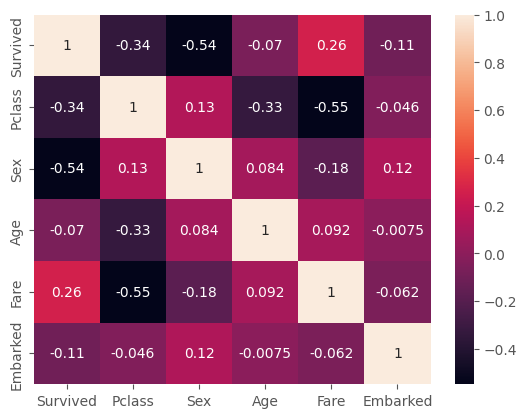

In [8]:
sns.heatmap(df[['Survived','Pclass','Sex','Age','Fare','Embarked']].dropna().corr(),annot=True)

In [9]:
# Creating a multiple linear regression 

model =  sm.ols(formula='Survived ~ Sex',data=df) 
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     372.4
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.41e-69
Time:                        20:17:44   Log-Likelihood:                -466.09
No. Observations:                 891   AIC:                             936.2
Df Residuals:                     889   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7420      0.023     32.171      0.000       0.697       0.787
Sex           -0.5531      0.029    -19.298      0.000      -0.609      -0.497
==============================================================================
Omnibus:                       25.424   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.169
Skew:                           0.427   Prob(JB):                     1.26e-06
Kurtosis:                       2.963   Cond. No.                         3.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Testing our Model
test_df = pd.read_csv('/kaggle/input/titanic-dataset/test.csv')
test_df['Sex'] =  test_df['Sex'].replace('female',0).replace('male',1)
new_data = pd.DataFrame({'Sex': test_df['Sex']})


/tmp/ipykernel_18/2590517356.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Sex'] =  test_df['Sex'].replace('female',0).replace('male',1)


In [11]:
predicted = round(model.predict(new_data))
predicted.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
dtype: float64

In [12]:
gender_submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':predicted})

In [13]:
gender_submission.head()
gender_submission.to_csv('./gender_submission.csv',index=False)  